***
# Pandas Fundamentals
* **Earth Data Science with Python**
- **Student:** Gabriel Martinez
* **Date:** 19/09/2024
***

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<Axes: >

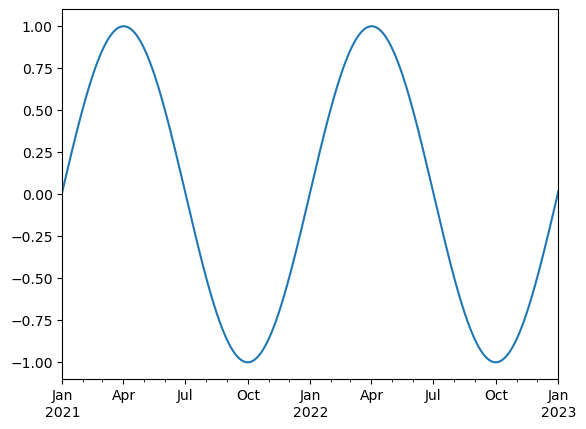

In [7]:
# The function for creating timeseries
two_years = pd.date_range(start="2021-01-01", end="2023-01-01", freq="D")
timeseries = pd.Series(np.sin(2 * np.pi * two_years.dayofyear / 365), index=two_years)
timeseries.plot()

<Axes: >

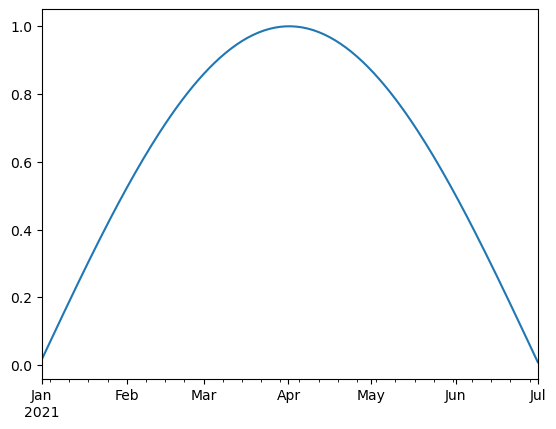

In [8]:
# Built in plot
timeseries.loc["2021-01-01":"2021-07-01"].plot()

In [9]:
timeseries.index.month

Index([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       ...
       12, 12, 12, 12, 12, 12, 12, 12, 12,  1],
      dtype='int32', length=731)

In [10]:
timeseries.index.month

Index([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       ...
       12, 12, 12, 12, 12, 12, 12, 12, 12,  1],
      dtype='int32', length=731)

## Reading Data Files: Weather Station Data

In [11]:
import pooch

POOCH = pooch.create(
    path=pooch.os_cache("noaa-data"),
    base_url="doi:10.5281/zenodo.5564850/",
    registry={
        "data.txt": "md5:5129dcfd19300eb8d4d8d1673fcfbcb4",
    },
)
datafile = POOCH.fetch("data.txt")
datafile

'C:\\Users\\Gabriel\\AppData\\Local\\noaa-data\\noaa-data\\Cache\\data.txt'

In [12]:
df = pd.read_csv(datafile)
df.head()

,WBANNO LST_DATE CRX_VN LONGITUDE LATITUDE T_DAILY_MAX T_DAILY_MIN T_DAILY_MEAN T_DAILY_AVG P_DAILY_CALC SOLARAD_DAILY SUR_TEMP_DAILY_TYPE SUR_TEMP_DAILY_MAX SUR_TEMP_DAILY_MIN SUR_TEMP_DAILY_AVG RH_DAILY_MAX RH_DAILY_MIN RH_DAILY_AVG SOIL_MOISTURE_5_DAILY SOIL_MOISTURE_10_DAILY SOIL_MOISTURE_20_DAILY SOIL_MOISTURE_50_DAILY SOIL_MOISTURE_100_DAILY SOIL_TEMP_5_DAILY SOIL_TEMP_10_DAILY SOIL_TEMP_20_DAILY SOIL_TEMP_50_DAILY SOIL_TEMP_100_DAILY
0,64756 20170101 2.422 -73.74 41.79 6.6 ...
1,64756 20170102 2.422 -73.74 41.79 4.0 ...
2,64756 20170103 2.422 -73.74 41.79 4.9 ...
3,64756 20170104 2.422 -73.74 41.79 8.7 ...
4,64756 20170105 2.422 -73.74 41.79 -0.5 ...


In [40]:
df = pd.read_csv(datafile, sep="\s+", na_values=[-9999.0, -99.0], parse_dates=[1])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   WBANNO                   365 non-null    int64         
 1   LST_DATE                 365 non-null    datetime64[ns]
 2   CRX_VN                   365 non-null    float64       
 3   LONGITUDE                365 non-null    float64       
 4   LATITUDE                 365 non-null    float64       
 5   T_DAILY_MAX              364 non-null    float64       
 6   T_DAILY_MIN              364 non-null    float64       
 7   T_DAILY_MEAN             364 non-null    float64       
 8   T_DAILY_AVG              364 non-null    float64       
 9   P_DAILY_CALC             364 non-null    float64       
 10  SOLARAD_DAILY            364 non-null    float64       
 11  SUR_TEMP_DAILY_TYPE      365 non-null    object        
 12  SUR_TEMP_DAILY_MAX       364 non-nul

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Gabriel\AppData\Local\Temp\ipykernel_28724\293020238.py:1: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv(datafile, sep='\s+',


In [41]:
df = df.set_index("LST_DATE")
df.head()

,WBANNO,CRX_VN,LONGITUDE,LATITUDE,T_DAILY_MAX,T_DAILY_MIN,T_DAILY_MEAN,T_DAILY_AVG,P_DAILY_CALC,SOLARAD_DAILY,...,SOIL_MOISTURE_5_DAILY,SOIL_MOISTURE_10_DAILY,SOIL_MOISTURE_20_DAILY,SOIL_MOISTURE_50_DAILY,SOIL_MOISTURE_100_DAILY,SOIL_TEMP_5_DAILY,SOIL_TEMP_10_DAILY,SOIL_TEMP_20_DAILY,SOIL_TEMP_50_DAILY,SOIL_TEMP_100_DAILY
LST_DATE,,,,,,,,,,,,,,,,,,,,,
2017-01-01,64756,2.422,-73.74,41.79,6.6,-5.4,0.6,2.2,0.0,8.68,...,NaN,NaN,0.207,0.152,0.175,-0.1,0.0,0.6,1.5,3.4
2017-01-02,64756,2.422,-73.74,41.79,4.0,-6.8,-1.4,-1.2,0.0,2.08,...,NaN,NaN,0.205,0.151,0.173,-0.2,0.0,0.6,1.5,3.3
2017-01-03,64756,2.422,-73.74,41.79,4.9,0.7,2.8,2.7,13.1,0.68,...,NaN,NaN,0.205,0.150,0.173,-0.1,0.0,0.5,1.5,3.3
2017-01-04,64756,2.422,-73.74,41.79,8.7,-1.6,3.6,3.5,1.3,2.85,...,NaN,NaN,0.215,0.153,0.174,-0.1,0.0,0.5,1.5,3.2
2017-01-05,64756,2.422,-73.74,41.79,-0.5,-4.6,-2.5,-2.8,0.0,4.90,...,NaN,NaN,0.215,0.154,0.177,-0.1,0.0,0.5,1.4,3.1


In [42]:
df.loc["2017-08-07"]

WBANNO                     64756
CRX_VN                     2.422
LONGITUDE                 -73.74
LATITUDE                   41.79
T_DAILY_MAX                 19.3
T_DAILY_MIN                 12.3
T_DAILY_MEAN                15.8
T_DAILY_AVG                 16.3
P_DAILY_CALC                 4.9
SOLARAD_DAILY               3.93
SUR_TEMP_DAILY_TYPE            C
SUR_TEMP_DAILY_MAX          22.3
SUR_TEMP_DAILY_MIN          11.9
SUR_TEMP_DAILY_AVG          17.7
RH_DAILY_MAX                94.7
RH_DAILY_MIN                76.4
RH_DAILY_AVG                89.5
SOIL_MOISTURE_5_DAILY      0.148
SOIL_MOISTURE_10_DAILY     0.113
SOIL_MOISTURE_20_DAILY     0.094
SOIL_MOISTURE_50_DAILY     0.114
SOIL_MOISTURE_100_DAILY    0.151
SOIL_TEMP_5_DAILY           21.4
SOIL_TEMP_10_DAILY          21.7
SOIL_TEMP_20_DAILY          22.1
SOIL_TEMP_50_DAILY          22.2
SOIL_TEMP_100_DAILY         21.5
Name: 2017-08-07 00:00:00, dtype: object

In [44]:
df.loc["2017-07-01":"2017-07-31"]

,WBANNO,CRX_VN,LONGITUDE,LATITUDE,T_DAILY_MAX,T_DAILY_MIN,T_DAILY_MEAN,T_DAILY_AVG,P_DAILY_CALC,SOLARAD_DAILY,...,SOIL_MOISTURE_5_DAILY,SOIL_MOISTURE_10_DAILY,SOIL_MOISTURE_20_DAILY,SOIL_MOISTURE_50_DAILY,SOIL_MOISTURE_100_DAILY,SOIL_TEMP_5_DAILY,SOIL_TEMP_10_DAILY,SOIL_TEMP_20_DAILY,SOIL_TEMP_50_DAILY,SOIL_TEMP_100_DAILY
LST_DATE,,,,,,,,,,,,,,,,,,,,,
2017-07-01,64756,2.422,-73.74,41.79,28.0,19.7,23.9,23.8,0.2,19.28,...,0.157,0.136,0.144,0.129,0.163,25.7,25.4,23.7,21.9,19.9
2017-07-02,64756,2.422,-73.74,41.79,29.8,18.4,24.1,23.7,4.0,27.67,...,0.146,0.135,0.143,0.129,0.162,26.8,26.4,24.5,22.3,20.1
2017-07-03,64756,2.422,-73.74,41.79,28.3,15.0,21.7,21.4,0.0,27.08,...,0.141,0.132,0.139,0.128,0.162,26.4,26.3,24.8,22.8,20.3
2017-07-04,64756,2.422,-73.74,41.79,26.8,12.6,19.7,20.0,0.0,29.45,...,0.131,0.126,0.136,0.126,0.161,25.9,25.8,24.6,22.9,20.6
2017-07-05,64756,2.422,-73.74,41.79,28.0,11.9,20.0,20.7,0.0,26.90,...,0.116,0.114,0.131,0.125,0.161,25.3,25.3,24.2,22.8,20.7
2017-07-06,64756,2.422,-73.74,41.79,25.7,14.3,20.0,20.3,0.0,19.03,...,0.105,0.104,0.126,0.124,0.160,24.7,24.7,23.9,22.7,20.9
2017-07-07,64756,2.422,-73.74,41.79,25.8,16.8,21.3,20.0,11.5,13.88,...,0.114,0.100,0.123,0.123,0.160,24.2,24.2,23.4,22.4,20.8
2017-07-08,64756,2.422,-73.74,41.79,29.0,15.3,22.1,21.5,0.0,21.92,...,0.130,0.106,0.122,0.123,0.159,25.5,25.3,23.9,22.4,20.8
2017-07-09,64756,2.422,-73.74,41.79,26.3,10.9,18.6,19.4,0.0,29.72,...,0.119,0.103,0.119,0.121,0.158,24.8,24.8,23.8,22.5,20.8


In [45]:
df.describe()

,WBANNO,CRX_VN,LONGITUDE,LATITUDE,T_DAILY_MAX,T_DAILY_MIN,T_DAILY_MEAN,T_DAILY_AVG,P_DAILY_CALC,SOLARAD_DAILY,...,SOIL_MOISTURE_5_DAILY,SOIL_MOISTURE_10_DAILY,SOIL_MOISTURE_20_DAILY,SOIL_MOISTURE_50_DAILY,SOIL_MOISTURE_100_DAILY,SOIL_TEMP_5_DAILY,SOIL_TEMP_10_DAILY,SOIL_TEMP_20_DAILY,SOIL_TEMP_50_DAILY,SOIL_TEMP_100_DAILY
count,365.0,365.000000,3.650000e+02,3.650000e+02,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,...,317.000000,317.000000,336.000000,364.000000,359.000000,364.000000,364.000000,364.000000,364.000000,364.000000
mean,64756.0,2.470767,-7.374000e+01,4.179000e+01,15.720055,4.037912,9.876374,9.990110,2.797802,13.068187,...,0.189498,0.183991,0.165470,0.140192,0.160630,12.312637,12.320604,12.060165,11.978022,11.915659
std,0.0,0.085997,5.265234e-13,3.842198e-13,10.502087,9.460676,9.727451,9.619168,7.238628,7.953074,...,0.052031,0.054113,0.043989,0.020495,0.016011,9.390034,9.338176,8.767752,8.078346,7.187317
min,64756.0,2.422000,-7.374000e+01,4.179000e+01,-12.300000,-21.800000,-17.000000,-16.700000,0.000000,0.100000,...,0.075000,0.078000,0.087000,0.101000,0.117000,-0.700000,-0.400000,0.200000,0.900000,1.900000
25%,64756.0,2.422000,-7.374000e+01,4.179000e+01,6.900000,-2.775000,2.100000,2.275000,0.000000,6.225000,...,0.152000,0.139000,0.118750,0.118000,0.154000,2.225000,2.000000,2.475000,3.300000,4.100000
50%,64756.0,2.422000,-7.374000e+01,4.179000e+01,17.450000,4.350000,10.850000,11.050000,0.000000,12.865000,...,0.192000,0.198000,0.183000,0.147500,0.165000,13.300000,13.350000,13.100000,12.850000,11.600000
75%,64756.0,2.422000,-7.374000e+01,4.179000e+01,24.850000,11.900000,18.150000,18.450000,1.400000,19.740000,...,0.234000,0.227000,0.203000,0.157000,0.173000,21.025000,21.125000,20.400000,19.800000,19.325000
max,64756.0,2.622000,-7.374000e+01,4.179000e+01,33.400000,20.700000,25.700000,26.700000,65.700000,29.910000,...,0.296000,0.321000,0.235000,0.182000,0.192000,27.600000,27.400000,25.600000,24.100000,22.100000


## Plotting Values

[Text(1, 0, 'SOIL_MOISTURE_10_DAILY'),
 Text(2, 0, 'SOIL_MOISTURE_20_DAILY'),
 Text(3, 0, 'SOIL_MOISTURE_50_DAILY'),
 Text(4, 0, 'SOIL_MOISTURE_100_DAILY')]

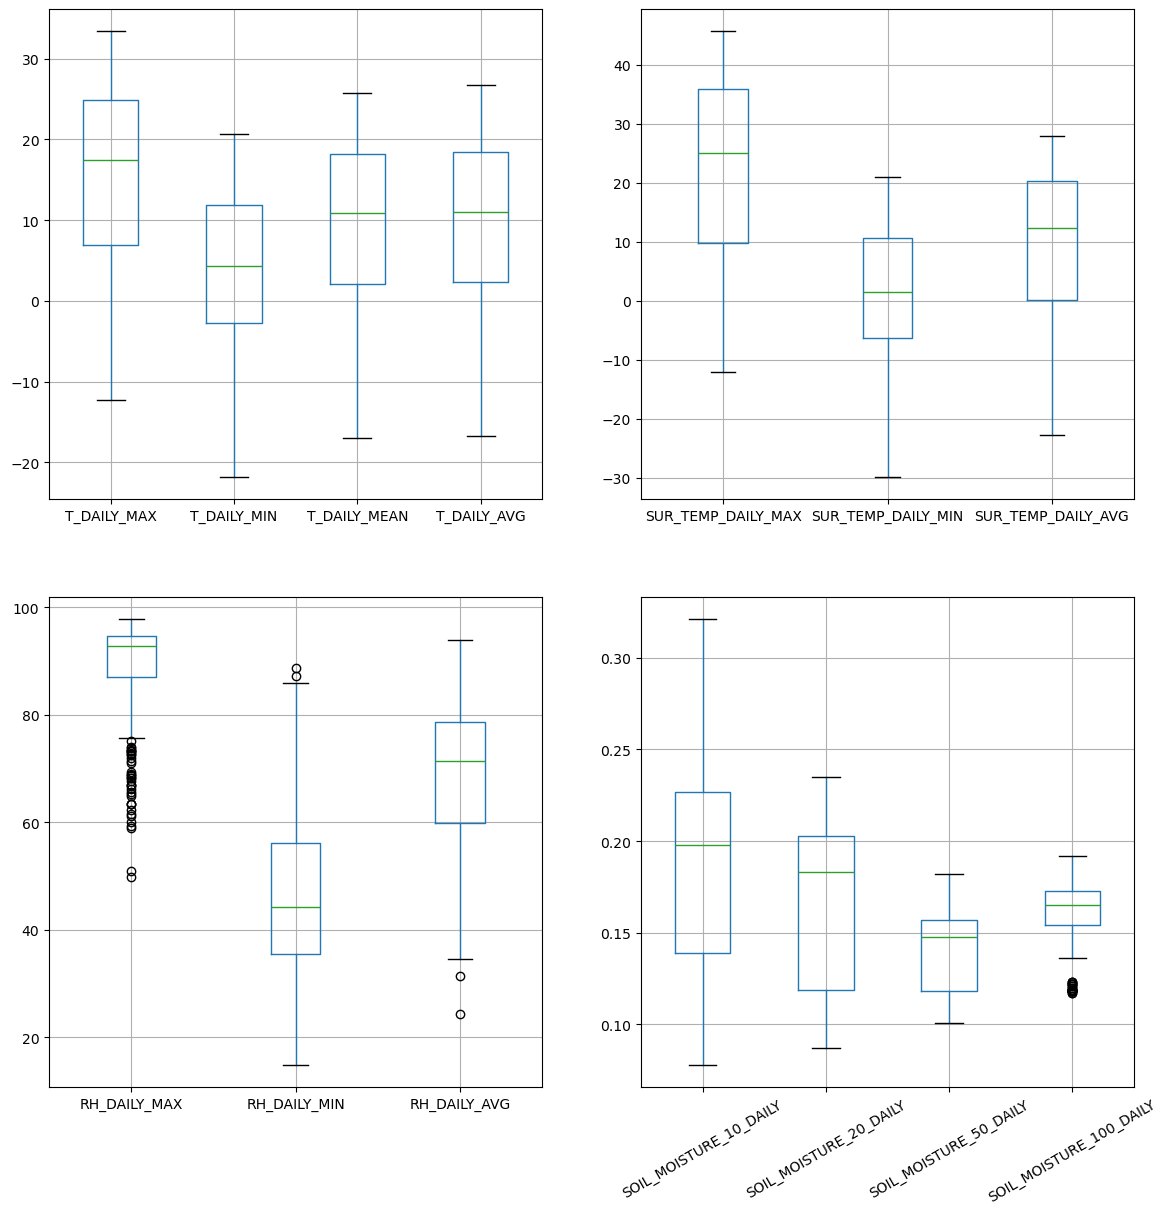

In [63]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(14, 14))

df.iloc[:, 4:8].boxplot(ax=ax[0, 0])
df.iloc[:, 10:14].boxplot(ax=ax[0, 1])
df.iloc[:, 14:17].boxplot(ax=ax[1, 0])
df.iloc[:, 18:22].boxplot(ax=ax[1, 1])

ax[1, 1].set_xticklabels(ax[1, 1].get_xticklabels(), rotation=30)

<Axes: xlabel='LST_DATE'>

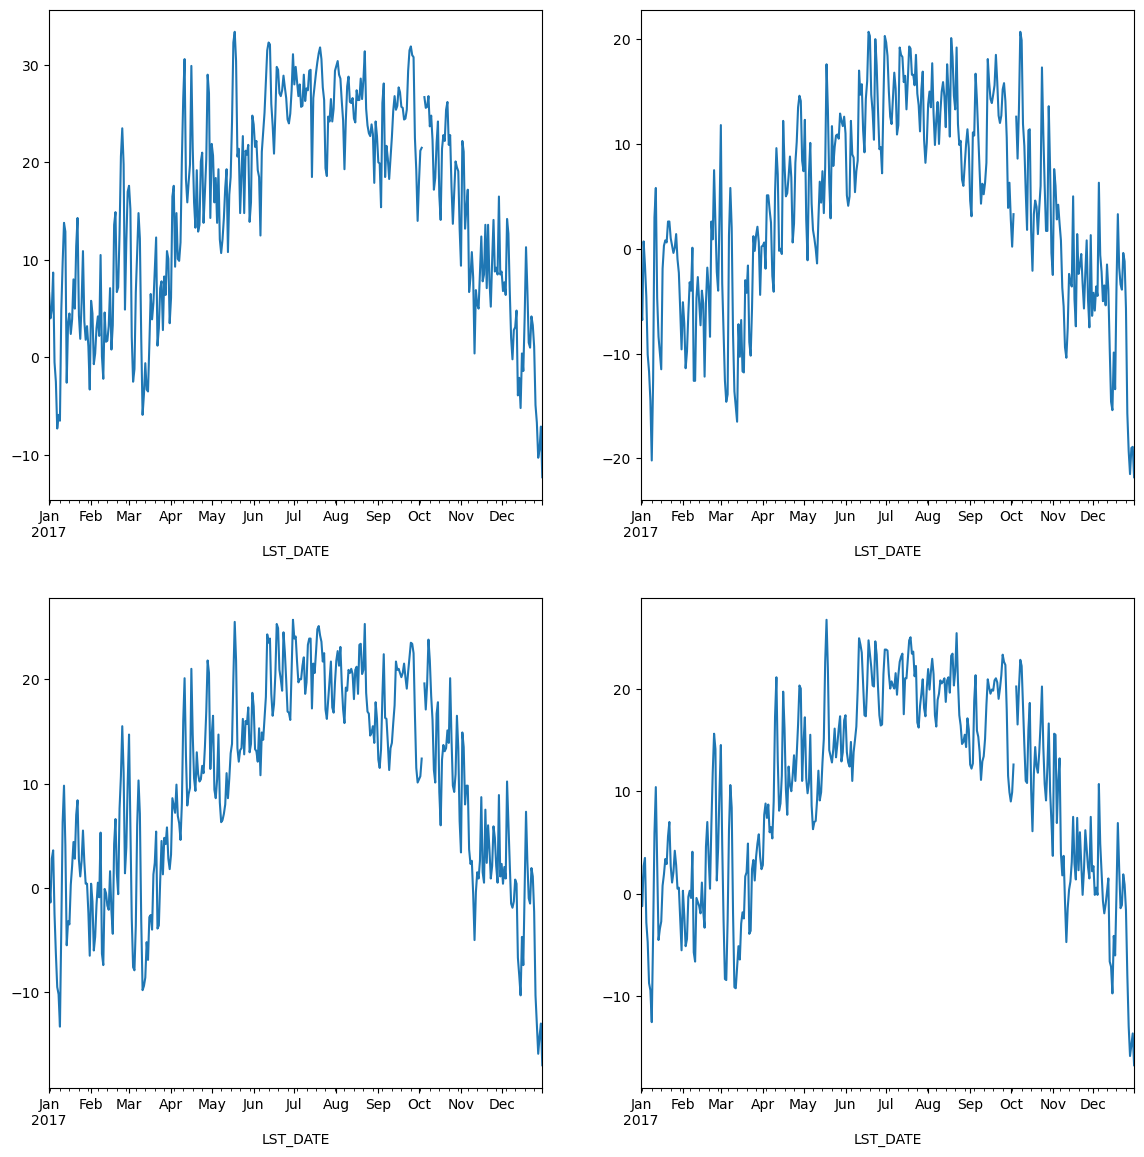

In [72]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(14, 14))

df.T_DAILY_MAX.plot(ax=ax[0, 0])
df.T_DAILY_MIN.plot(ax=ax[0, 1])
df.T_DAILY_MEAN.plot(ax=ax[1, 0])
df.T_DAILY_AVG.plot(ax=ax[1, 1])

Text(0.5, 1.0, 'Pandas MAde This')

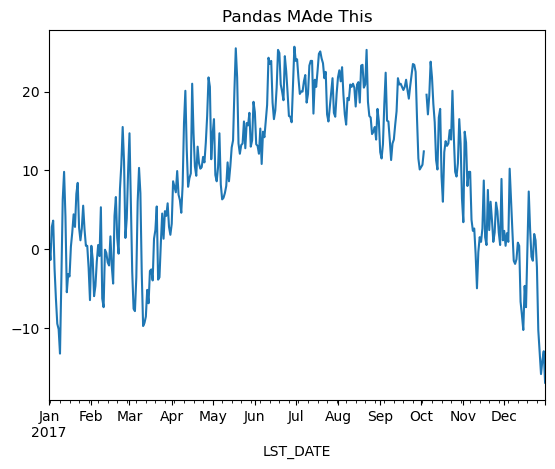

In [73]:
fig, ax = plt.subplots()
df.T_DAILY_MEAN.plot(ax=ax)
ax.set_title("Pandas MAde This")

<Axes: xlabel='LST_DATE'>

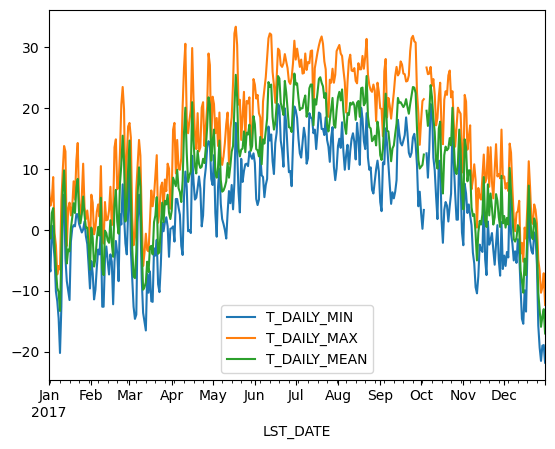

In [74]:
df[["T_DAILY_MIN", "T_DAILY_MAX", "T_DAILY_MEAN"]].plot()

## Resampling

In [85]:
# monthly reampler object
rs_obj = df.resample("MS")
rs_obj

In [90]:
df_mm = df.resample("MS").mean(numeric_only=True)

<Axes: xlabel='LST_DATE'>

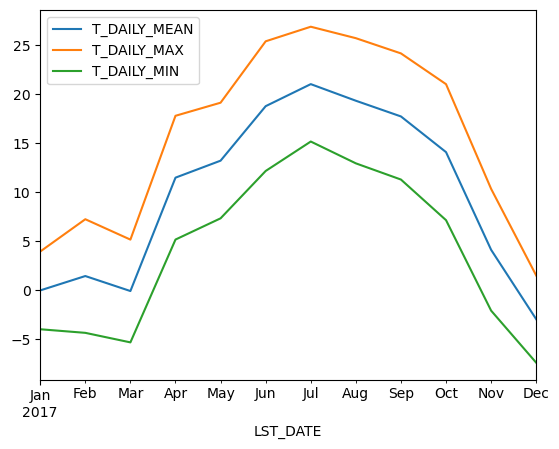

In [91]:
df_mm[["T_DAILY_MEAN", "T_DAILY_MAX", "T_DAILY_MIN"]].plot()